In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/covid_19_india.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
#plt.rcParams['figure.figsize']=17,8
import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
warnings.filterwarnings('ignore')

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

# vaccination drive

In [4]:
df_vaccine=pd.read_csv(r'../input/covid19-in-india/covid_vaccine_statewise.csv')

In [5]:
df_vaccine.head(144)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,04/06/2021,India,179205337.0,13131165.0,46141.0,179205337.0,44436944.0,96289872.0,82885972.0,29493.0,25581498.0,198045267.0,15516.0,21518.0,42587253.0,75746331.0,60810517.0,223642281.0
140,05/06/2021,India,182451348.0,12775190.0,45548.0,182451348.0,44711155.0,98143570.0,84277549.0,30229.0,26213604.0,200932620.0,16279.0,21637.0,44490432.0,76694765.0,61200972.0,227162503.0
141,06/06/2021,India,183824958.0,7228531.0,24346.0,183824958.0,44799620.0,98907905.0,84886553.0,30500.0,26450908.0,202156935.0,16735.0,21706.0,45391190.0,77035519.0,61331191.0,228624578.0
142,07/06/2021,India,186933771.0,12625429.0,45459.0,186933771.0,45129717.0,100656406.0,86246094.0,31271.0,27031124.0,205014564.0,17800.0,21820.0,47233720.0,77930082.0,61699177.0,232063488.0


In [6]:
df_vaccine.columns

Index(['Updated On', 'State', 'Total Individuals Vaccinated',
       'Total Sessions Conducted', 'Total Sites ', 'First Dose Administered',
       'Second Dose Administered', 'Male(Individuals Vaccinated)',
       'Female(Individuals Vaccinated)', 'Transgender(Individuals Vaccinated)',
       'Total Covaxin Administered', 'Total CoviShield Administered',
       'Total Sputnik V Administered', 'AEFI', '18-45 years (Age)',
       '45-60 years (Age)', '60+ years (Age)', 'Total Doses Administered'],
      dtype='object')

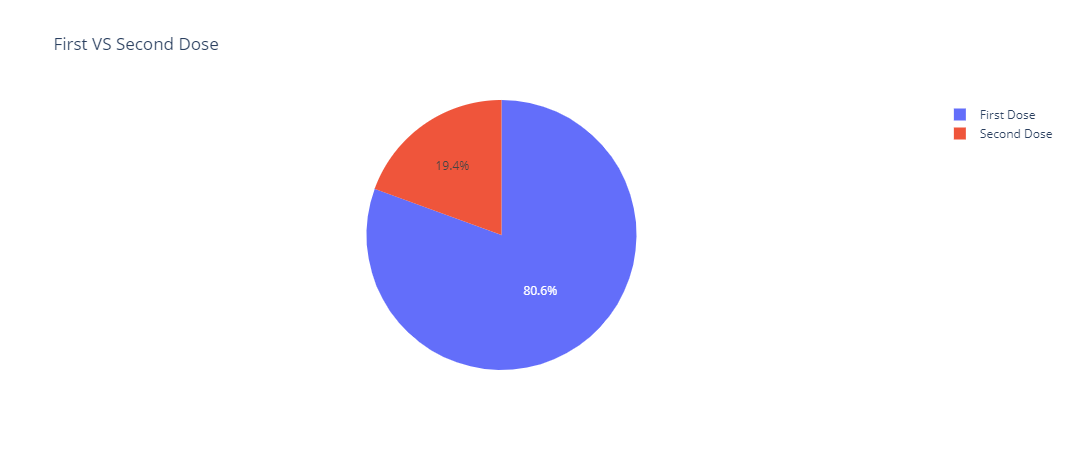

In [14]:
firstdose=df_vaccine["First Dose Administered"].iloc[142]
seconddose=df_vaccine["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdose,seconddose],title="First VS Second Dose")

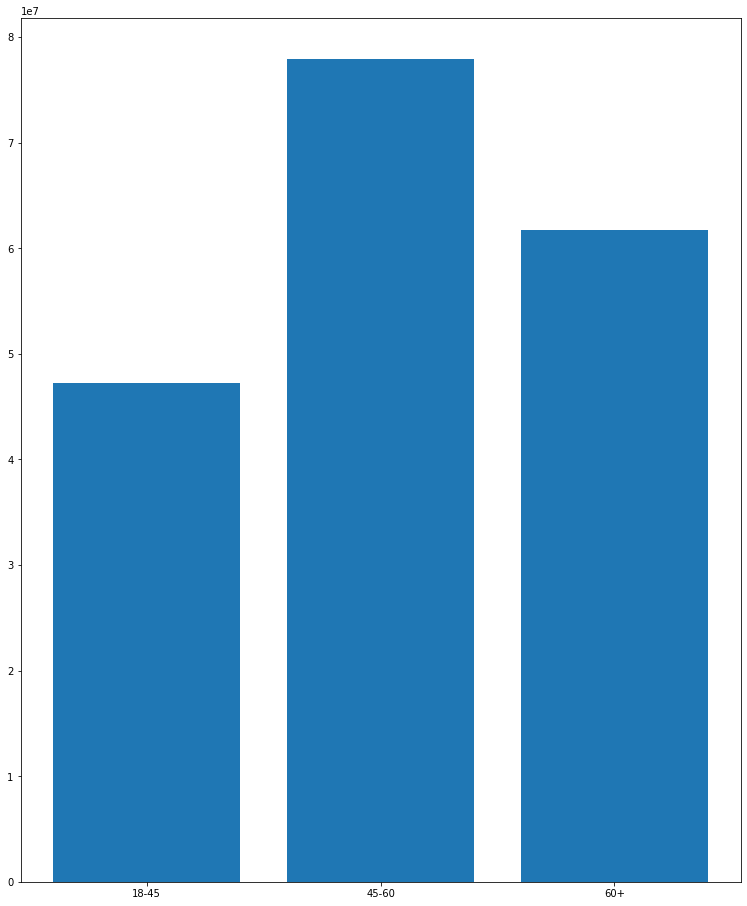

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstage=df_vaccine["18-45 years (Age)"].iloc[142]
secondage=df_vaccine["45-60 years (Age)"].iloc[142]
thirdage=df_vaccine["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstage,secondage,thirdage]
ax.bar(ages,vaccine)
plt.show()

In [16]:
display(df_vaccine.iloc[142])

Updated On                              07/06/2021
State                                        India
Total Individuals Vaccinated           186933771.0
Total Sessions Conducted                12625429.0
Total Sites                                45459.0
First Dose Administered                186933771.0
Second Dose Administered                45129717.0
Male(Individuals Vaccinated)           100656406.0
Female(Individuals Vaccinated)          86246094.0
Transgender(Individuals Vaccinated)        31271.0
Total Covaxin Administered              27031124.0
Total CoviShield Administered          205014564.0
Total Sputnik V Administered               17800.0
AEFI                                       21820.0
18-45 years (Age)                       47233720.0
45-60 years (Age)                       77930082.0
60+ years (Age)                         61699177.0
Total Doses Administered               232063488.0
Name: 142, dtype: object

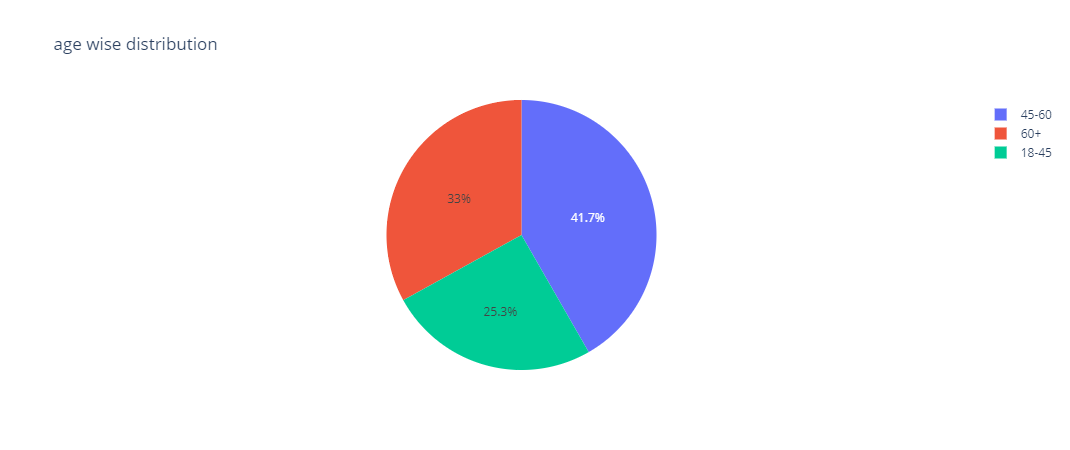

In [45]:
firstagepi=df_vaccine["18-45 years (Age)"].iloc[142]
secondagepi=df_vaccine["45-60 years (Age)"].iloc[142]
thirdagepi=df_vaccine["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepi,secondagepi,thirdagepi],title="age wise distribution")

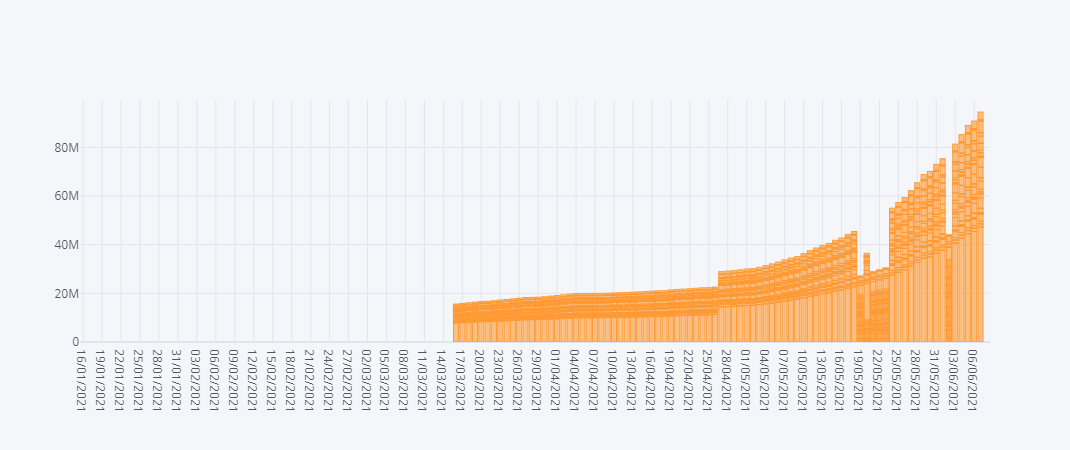

In [18]:
df_vaccine.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

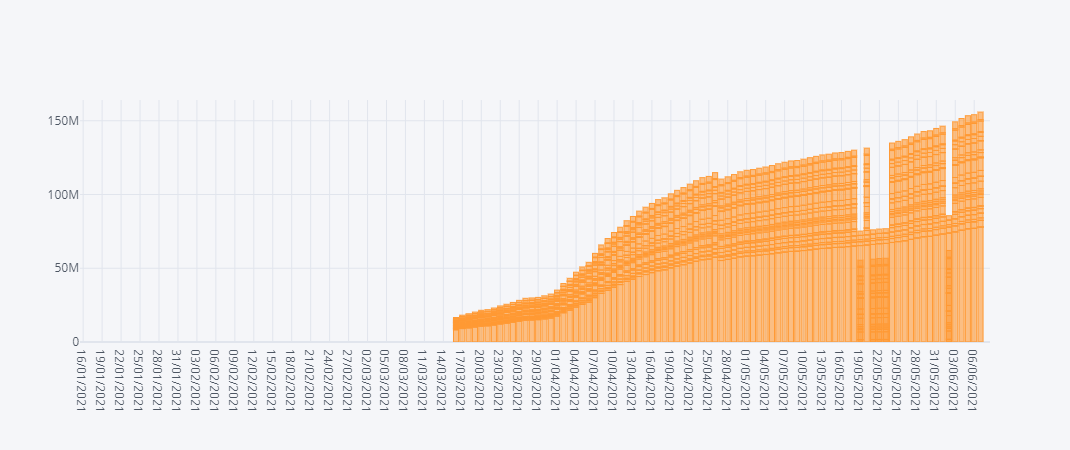

In [19]:
df_vaccine.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

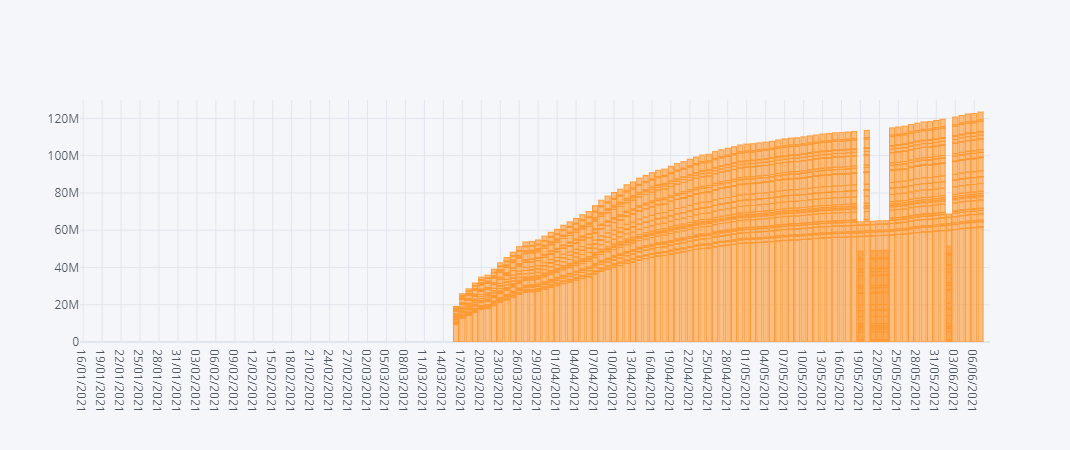

In [20]:
df_vaccine.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

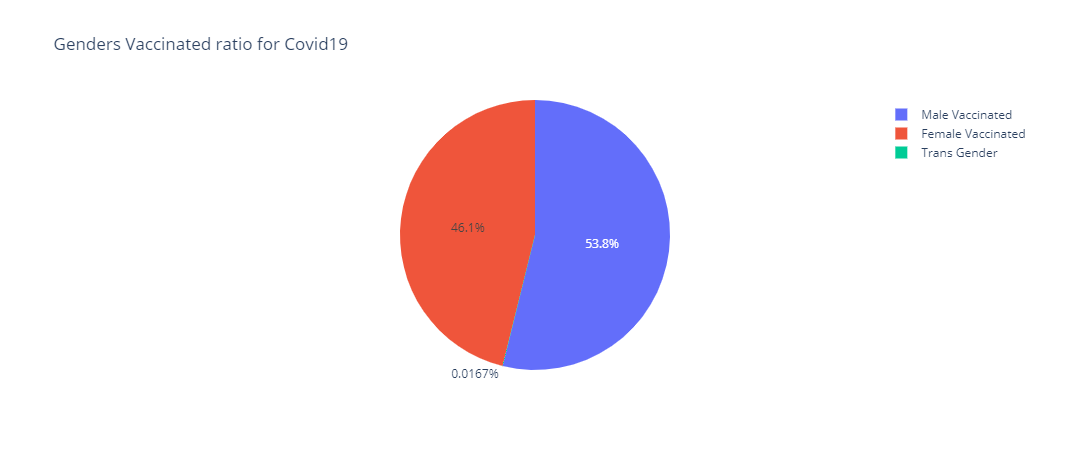

In [70]:
male = df_vaccine["Male(Individuals Vaccinated)"].iloc[142]
female = df_vaccine["Female(Individuals Vaccinated)"].iloc[142] 
trans = df_vaccine["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[male,female,trans],title="Genders Vaccinated ratio for Covid19")

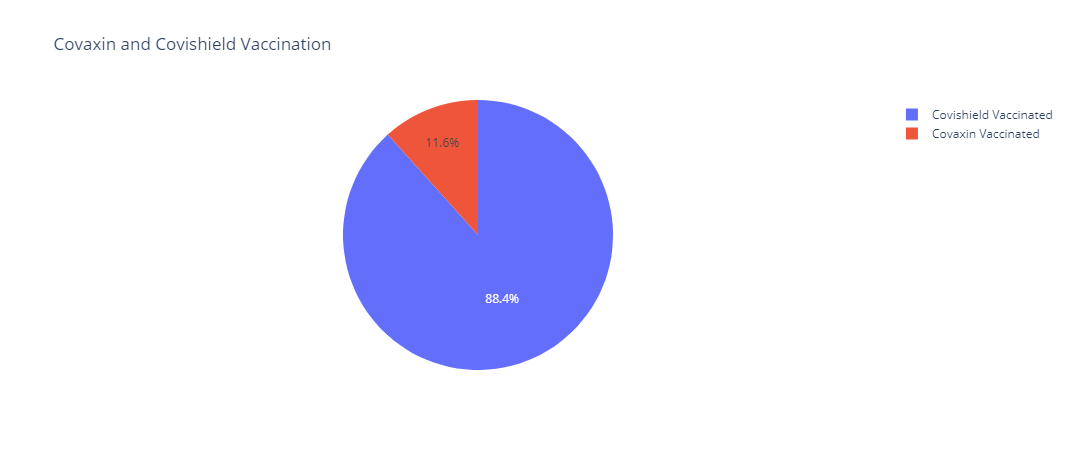

In [51]:
Covaxin = df_vaccine["Total Covaxin Administered"].iloc[142] 
Covishield = df_vaccine["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxin,Covishield],title="Covaxin and Covishield Vaccination")

In [27]:
df_vaccine.head(144)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,04/06/2021,India,179205337.0,13131165.0,46141.0,179205337.0,44436944.0,96289872.0,82885972.0,29493.0,25581498.0,198045267.0,15516.0,21518.0,42587253.0,75746331.0,60810517.0,223642281.0
140,05/06/2021,India,182451348.0,12775190.0,45548.0,182451348.0,44711155.0,98143570.0,84277549.0,30229.0,26213604.0,200932620.0,16279.0,21637.0,44490432.0,76694765.0,61200972.0,227162503.0
141,06/06/2021,India,183824958.0,7228531.0,24346.0,183824958.0,44799620.0,98907905.0,84886553.0,30500.0,26450908.0,202156935.0,16735.0,21706.0,45391190.0,77035519.0,61331191.0,228624578.0
142,07/06/2021,India,186933771.0,12625429.0,45459.0,186933771.0,45129717.0,100656406.0,86246094.0,31271.0,27031124.0,205014564.0,17800.0,21820.0,47233720.0,77930082.0,61699177.0,232063488.0


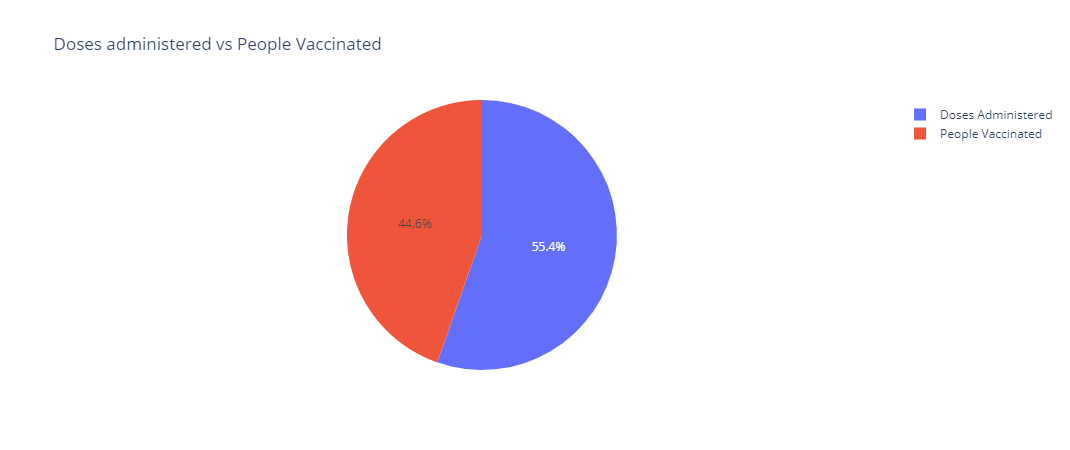

In [52]:
Doses = df_vaccine["Total Doses Administered"].iloc[142] 
Vaccinated = df_vaccine["Total Individuals Vaccinated"].iloc[142] 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doses,Vaccinated],title="Doses administered vs People Vaccinated")

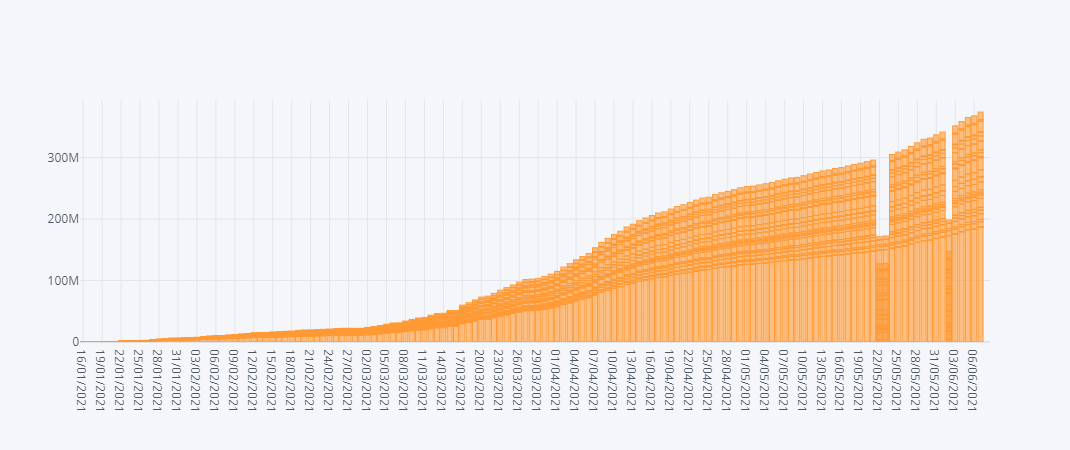

In [47]:
df_vaccine.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [29]:
df_vaccine.head()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [30]:
df_vaccine['State'].unique()

array(['India', 'Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh',
       'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

# Let's Analyze 3 States of How many People gets Vaccinated
# Karnataka,Kerala,Tamil Nadu

In [31]:
df_karnataka=df_vaccine[df_vaccine['State']=='Karnataka']
df_kerala=df_vaccine[df_vaccine['State']=='Kerala']
df_tamilnadu=df_vaccine[df_vaccine['State']=='Tamil Nadu']

In [32]:
df_karnataka.tail()

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
2443,04/06/2021,Karnataka,11899361.0,1616711.0,5043.0,11899361.0,2836000.0,6081337.0,5816194.0,1830.0,1624209.0,13111152.0,0.0,2535.0,2838700.0,5006585.0,4048250.0,14735361.0
2444,05/06/2021,Karnataka,12206183.0,1680845.0,5276.0,12206183.0,2862414.0,6253471.0,5950834.0,1878.0,1665088.0,13403436.0,73.0,2540.0,3034401.0,5089306.0,4076171.0,15068597.0
2445,06/06/2021,Karnataka,12333182.0,1144187.0,3719.0,12333182.0,2870122.0,6321434.0,6009848.0,1900.0,1676132.0,13526684.0,488.0,2541.0,3122648.0,5118143.0,4085918.0,15203304.0
2446,07/06/2021,Karnataka,12612607.0,1607382.0,5113.0,12612607.0,2891920.0,6475386.0,6135260.0,1961.0,1702136.0,13801567.0,824.0,2542.0,3296754.0,5195770.0,4113287.0,15504527.0
2447,08/06/2021,Karnataka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
display(df_karnataka.iloc[142])

Updated On                             07/06/2021
State                                   Karnataka
Total Individuals Vaccinated           12612607.0
Total Sessions Conducted                1607382.0
Total Sites                                5113.0
First Dose Administered                12612607.0
Second Dose Administered                2891920.0
Male(Individuals Vaccinated)            6475386.0
Female(Individuals Vaccinated)          6135260.0
Transgender(Individuals Vaccinated)        1961.0
Total Covaxin Administered              1702136.0
Total CoviShield Administered          13801567.0
Total Sputnik V Administered                824.0
AEFI                                       2542.0
18-45 years (Age)                       3296754.0
45-60 years (Age)                       5195770.0
60+ years (Age)                         4113287.0
Total Doses Administered               15504527.0
Name: 2446, dtype: object

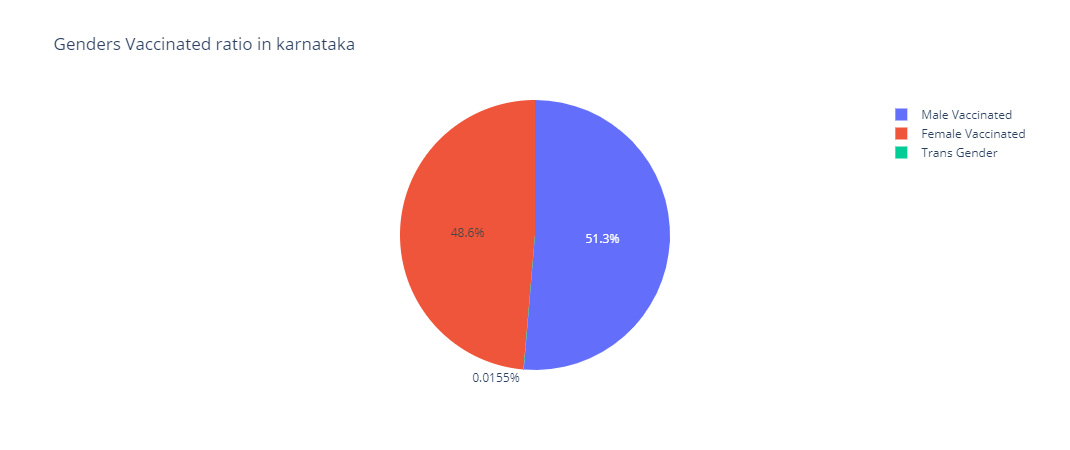

In [71]:
maleka = df_karnataka["Male(Individuals Vaccinated)"].iloc[142]
femaleka = df_karnataka["Female(Individuals Vaccinated)"].iloc[142] 
transka = df_karnataka["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[maleka,femaleka,transka],title="Genders Vaccinated ratio in karnataka")



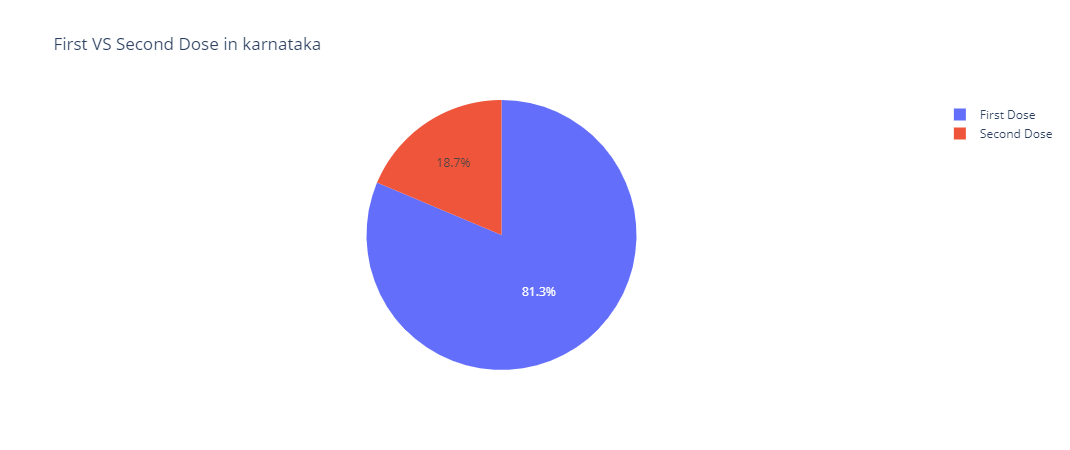

In [40]:
firstdoseka=df_karnataka["First Dose Administered"].iloc[142]
seconddoseka=df_karnataka["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdoseka,seconddoseka],title="First VS Second Dose in karnataka")

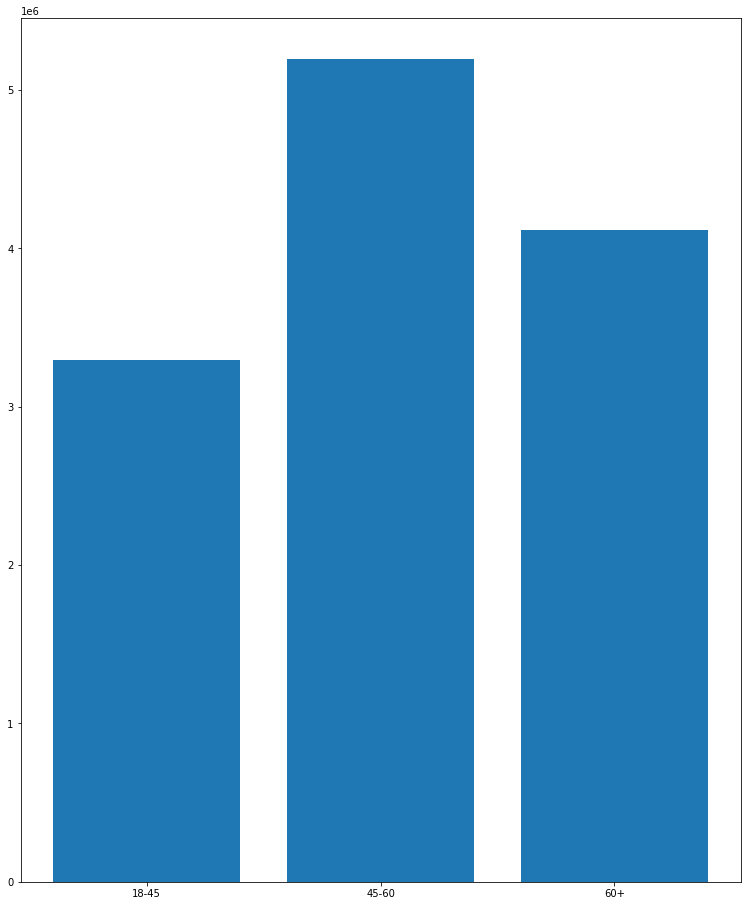

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstageka=df_karnataka["18-45 years (Age)"].iloc[142]
secondageka=df_karnataka["45-60 years (Age)"].iloc[142]
thirdageka=df_karnataka["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstageka,secondageka,thirdageka]
ax.bar(ages,vaccine)
plt.show()

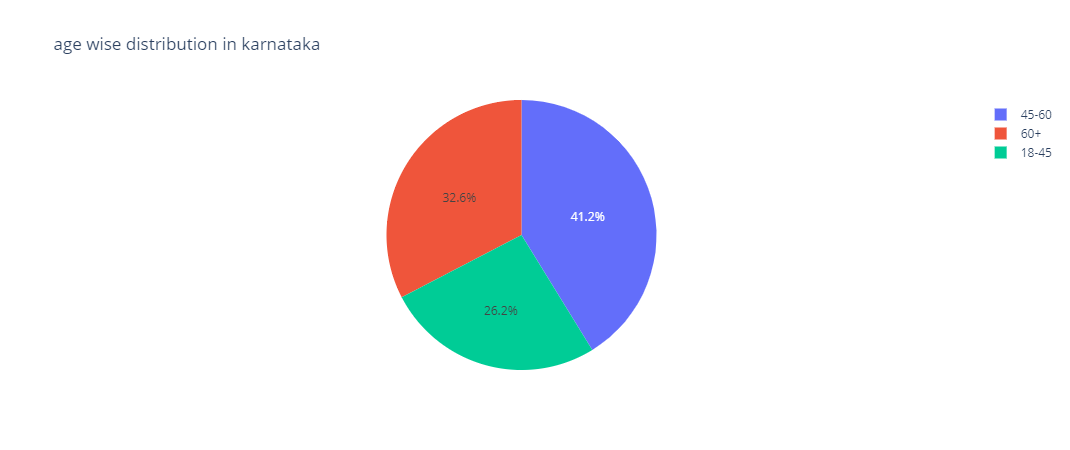

In [46]:
firstagepika=df_karnataka["18-45 years (Age)"].iloc[142]
secondagepika=df_karnataka["45-60 years (Age)"].iloc[142]
thirdagepika=df_karnataka["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepika,secondagepika,thirdagepika],title="age wise distribution in karnataka")

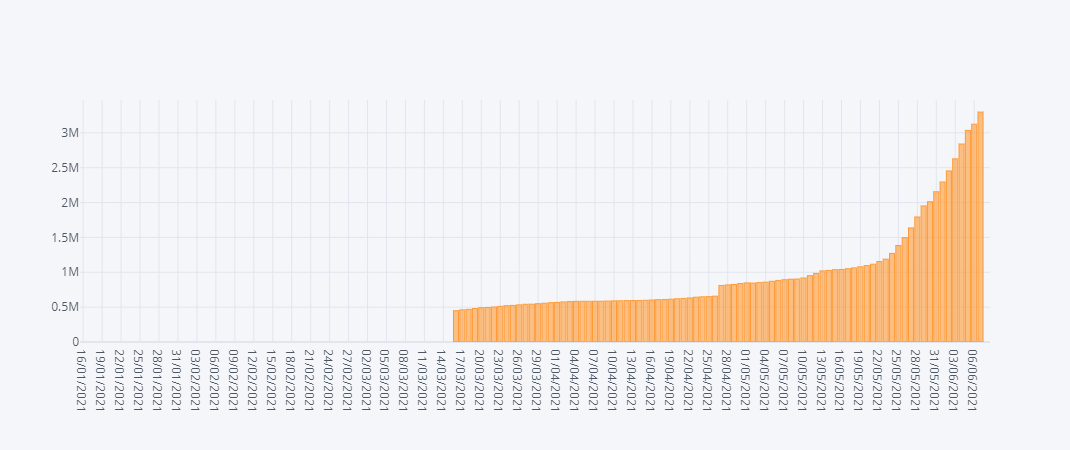

In [48]:
df_karnataka.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

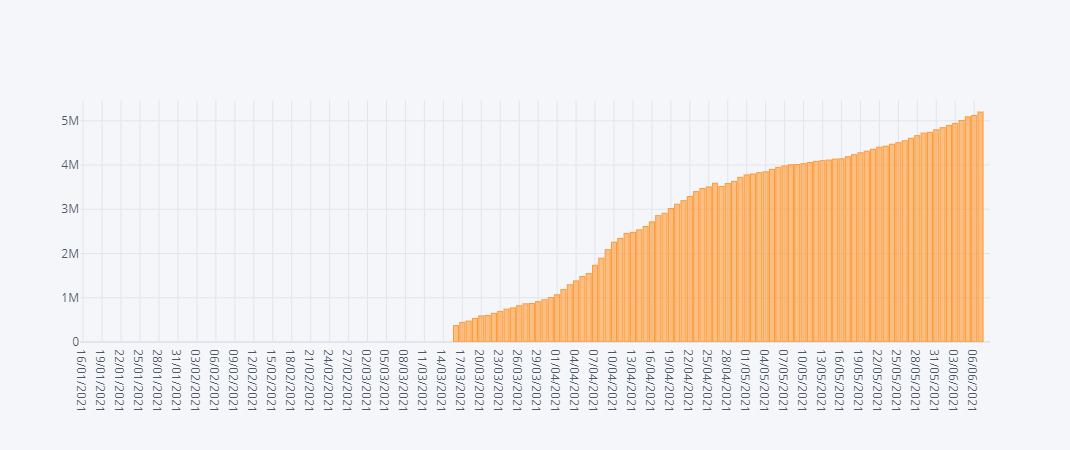

In [49]:
df_karnataka.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

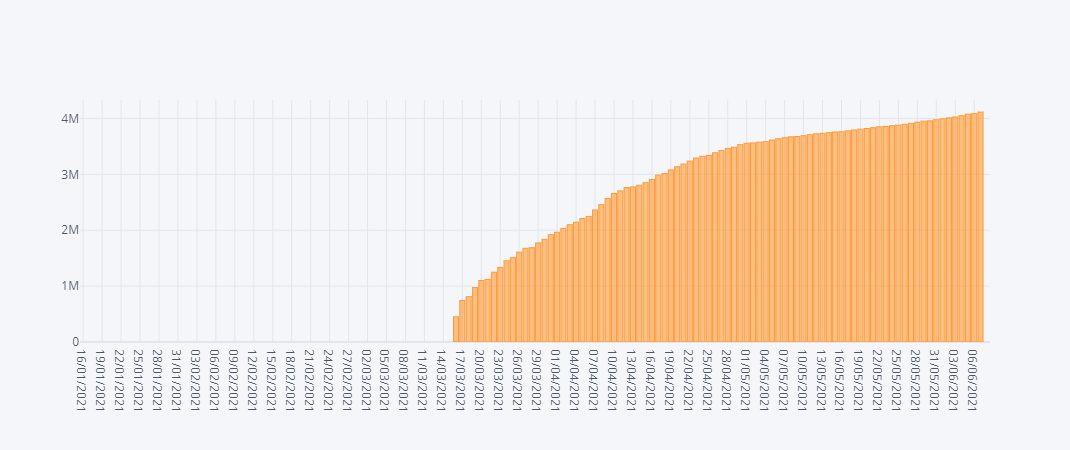

In [50]:
df_karnataka.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

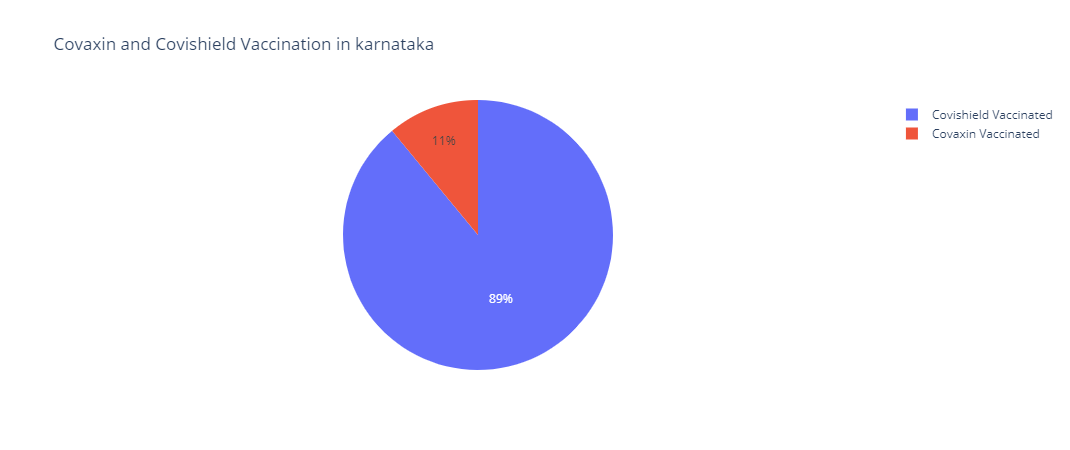

In [74]:
Covaxinka = df_karnataka["Total Covaxin Administered"].iloc[142] 
Covishieldka = df_karnataka["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxinka,Covishieldka],title="Covaxin and Covishield Vaccination in karnataka")

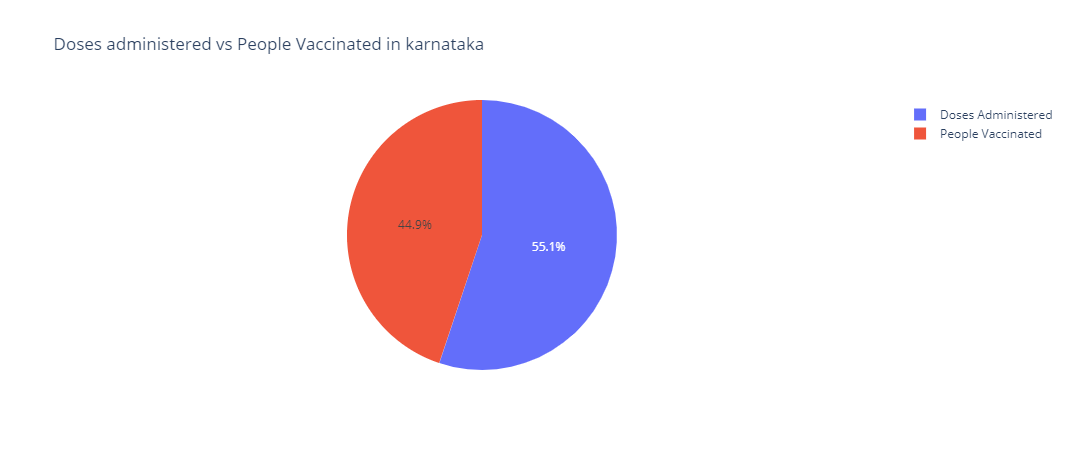

In [73]:
Doseska = df_karnataka["Total Doses Administered"].iloc[142]
Vaccinatedka = df_karnataka["Total Individuals Vaccinated"].iloc[142]
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doseska,Vaccinatedka],title="Doses administered vs People Vaccinated in karnataka")

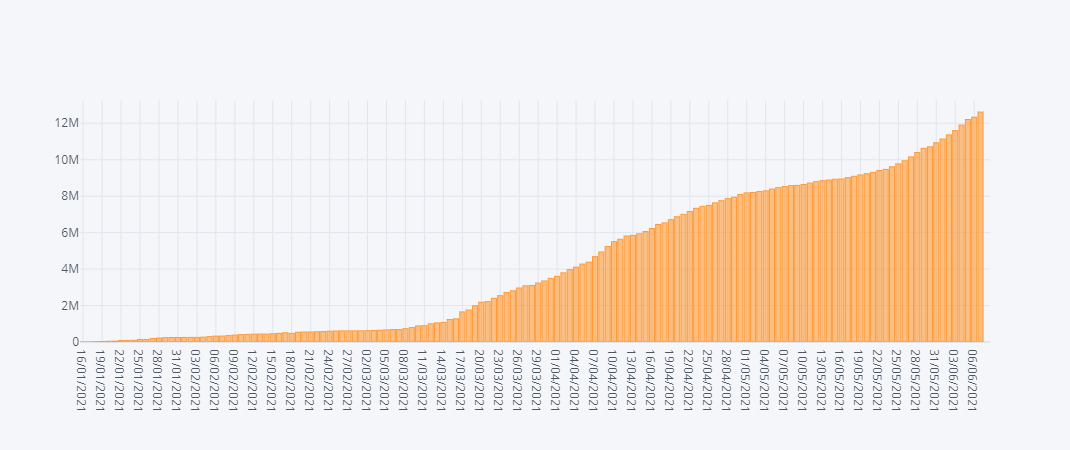

In [58]:
df_karnataka.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [59]:
df_kerala.tail(142)

,Updated On,State,Total Individuals Vaccinated,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Doses Administered
2450,18/01/2021,Kerala,2566.0,488.0,180.0,2566.0,0.0,746.0,1820.0,0.0,0.0,2566.0,NaN,NaN,NaN,NaN,NaN,2566.0
2451,19/01/2021,Kerala,5355.0,544.0,185.0,5355.0,0.0,1529.0,3826.0,0.0,0.0,5355.0,NaN,NaN,NaN,NaN,NaN,5355.0
2452,20/01/2021,Kerala,5398.0,716.0,216.0,5398.0,0.0,1552.0,3846.0,0.0,0.0,5398.0,NaN,NaN,NaN,NaN,NaN,5398.0
2453,21/01/2021,Kerala,9175.0,883.0,236.0,9175.0,0.0,2557.0,6618.0,0.0,0.0,9175.0,NaN,NaN,NaN,NaN,NaN,9175.0
2454,22/01/2021,Kerala,15501.0,1003.0,259.0,15501.0,0.0,4180.0,11321.0,0.0,0.0,15501.0,NaN,NaN,NaN,NaN,NaN,15501.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,04/06/2021,Kerala,7888884.0,320606.0,1218.0,7888884.0,2137743.0,3748295.0,4139368.0,1221.0,754258.0,9272350.0,19.0,2378.0,1135362.0,3159749.0,3588358.0,10026627.0
2588,05/06/2021,Kerala,8057972.0,354755.0,1279.0,8057972.0,2156991.0,3837947.0,4218767.0,1258.0,773840.0,9441101.0,22.0,2387.0,1187696.0,3233961.0,3630418.0,10214963.0
2589,06/06/2021,Kerala,8109567.0,119620.0,341.0,8109567.0,2160564.0,3864762.0,4243531.0,1274.0,780025.0,9490084.0,22.0,2390.0,1222658.0,3244830.0,3636049.0,10270131.0
2590,07/06/2021,Kerala,8302066.0,387925.0,1269.0,8302066.0,2170983.0,3968931.0,4331808.0,1327.0,812130.0,9660897.0,22.0,2396.0,1331763.0,3296604.0,3667093.0,10473049.0


In [62]:
display(df_kerala.iloc[142])

Updated On                             07/06/2021
State                                      Kerala
Total Individuals Vaccinated            8302066.0
Total Sessions Conducted                 387925.0
Total Sites                                1269.0
First Dose Administered                 8302066.0
Second Dose Administered                2170983.0
Male(Individuals Vaccinated)            3968931.0
Female(Individuals Vaccinated)          4331808.0
Transgender(Individuals Vaccinated)        1327.0
Total Covaxin Administered               812130.0
Total CoviShield Administered           9660897.0
Total Sputnik V Administered                 22.0
AEFI                                       2396.0
18-45 years (Age)                       1331763.0
45-60 years (Age)                       3296604.0
60+ years (Age)                         3667093.0
Total Doses Administered               10473049.0
Name: 2590, dtype: object

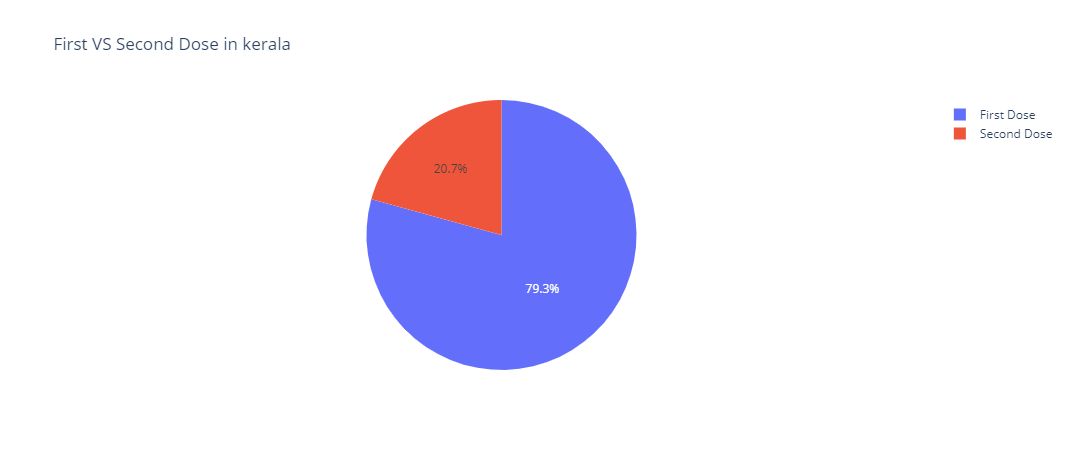

In [63]:
firstdoseke=df_kerala["First Dose Administered"].iloc[142]
seconddoseke=df_kerala["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdoseke,seconddoseke],title="First VS Second Dose in kerala")

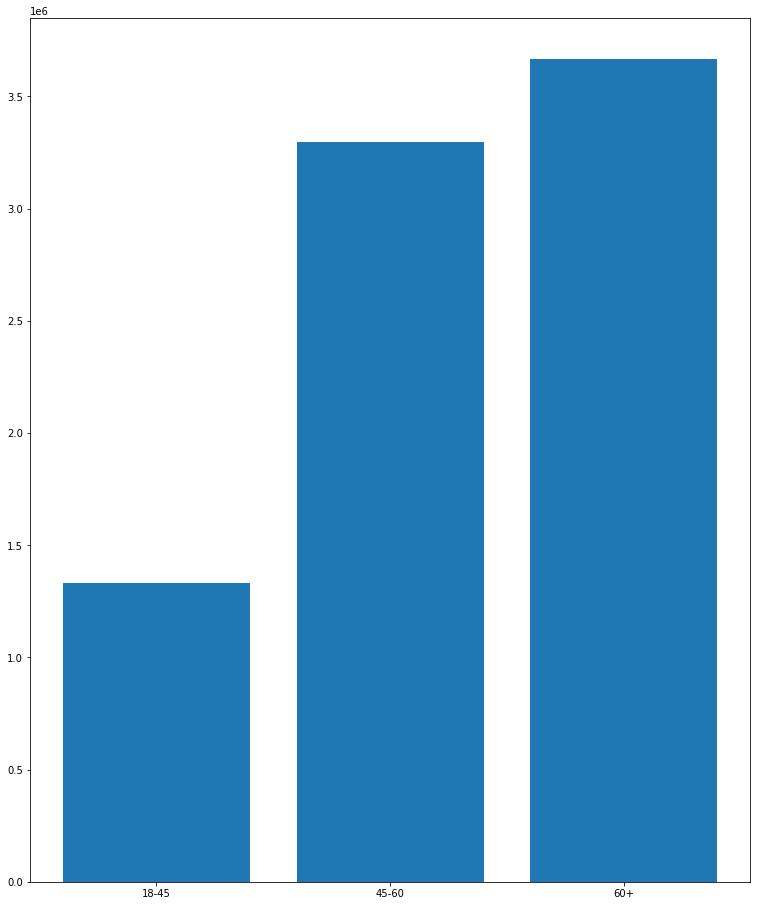

In [64]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstageke=df_kerala["18-45 years (Age)"].iloc[142]
secondageke=df_kerala["45-60 years (Age)"].iloc[142]
thirdageke=df_kerala["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstageke,secondageke,thirdageke]
ax.bar(ages,vaccine)
plt.show()

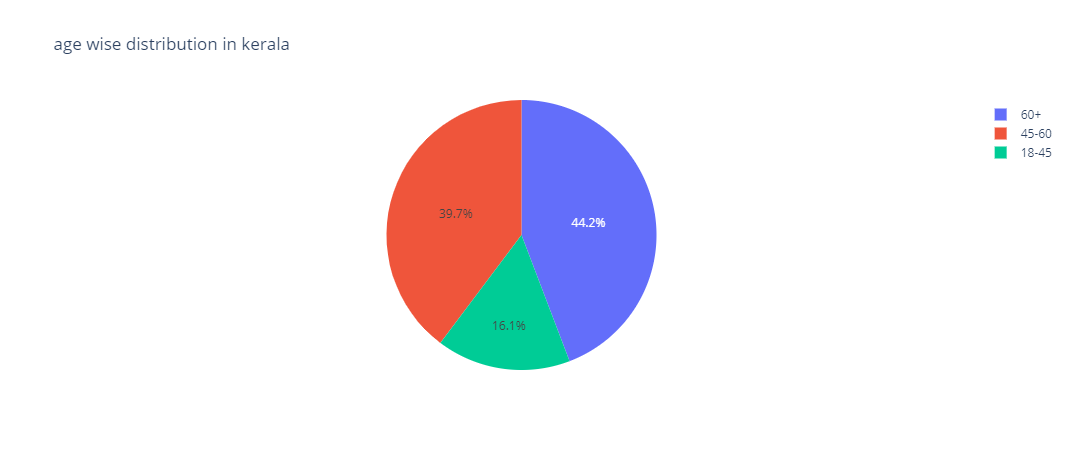

In [65]:
firstagepike=df_kerala["18-45 years (Age)"].iloc[142]
secondagepike=df_kerala["45-60 years (Age)"].iloc[142]
thirdagepike=df_kerala["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepike,secondagepike,thirdagepike],title="age wise distribution in kerala")

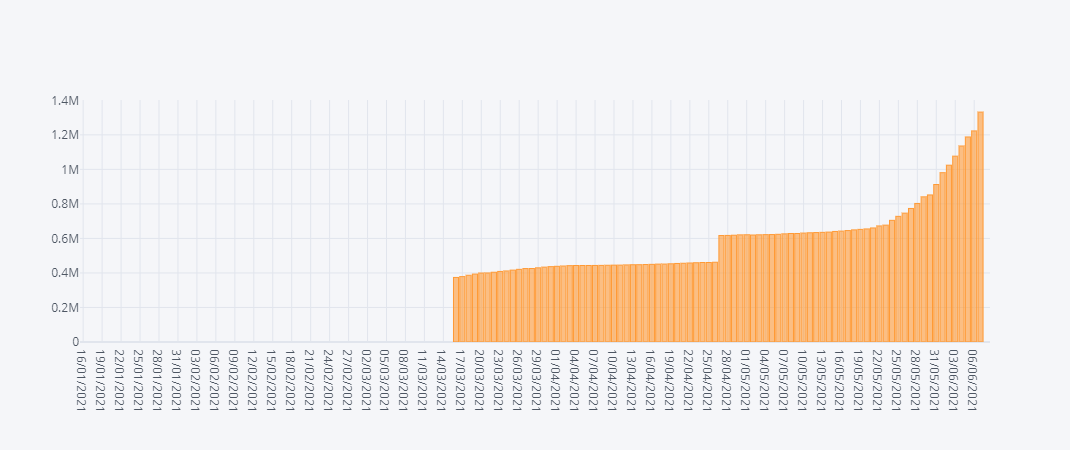

In [66]:
df_kerala.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

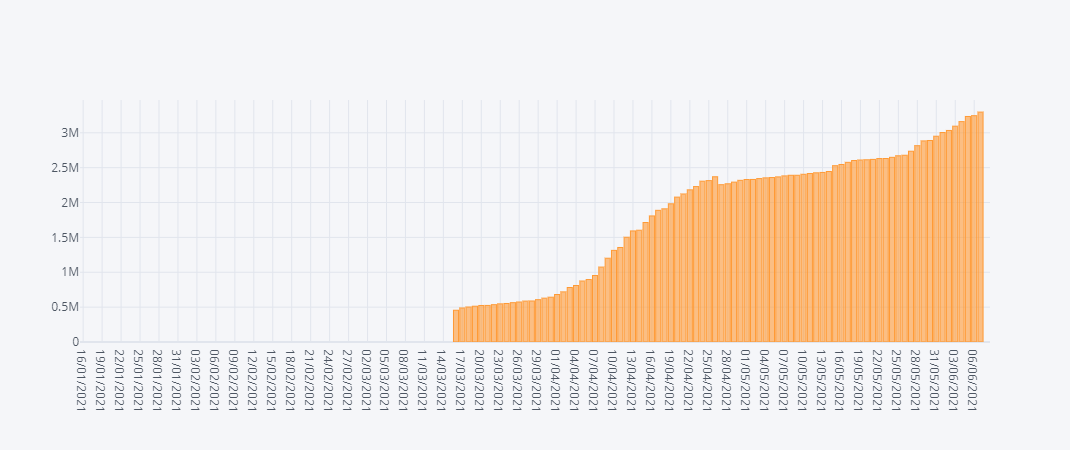

In [67]:
df_kerala.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

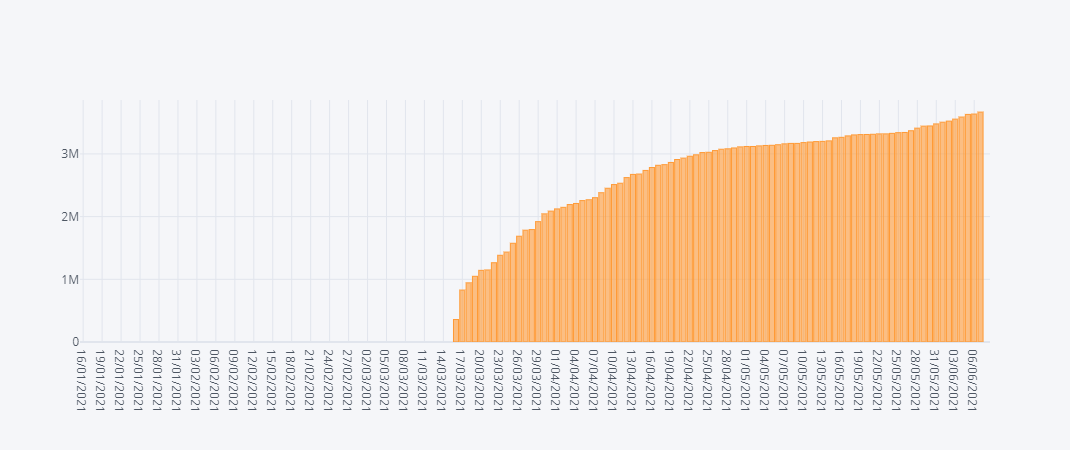

In [68]:
df_kerala.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

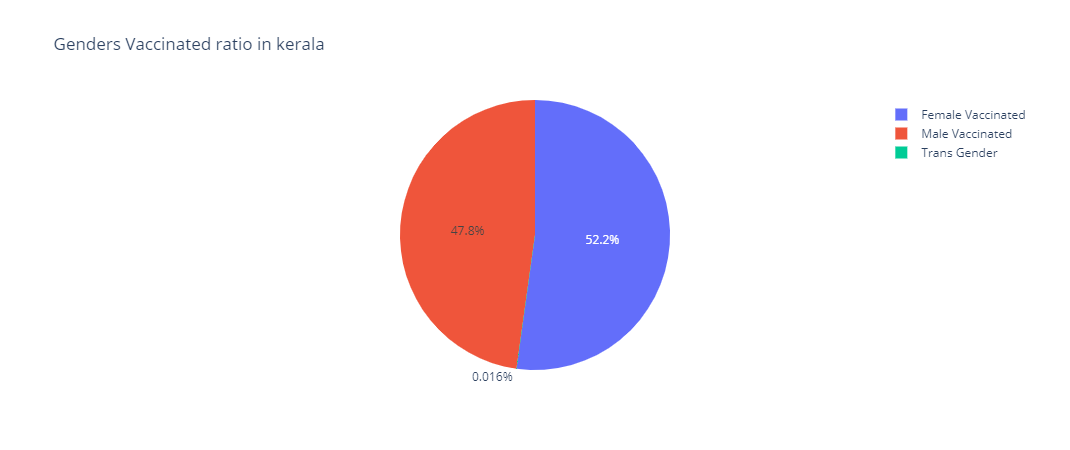

In [72]:
maleke = df_kerala["Male(Individuals Vaccinated)"].iloc[142]
femaleke = df_kerala["Female(Individuals Vaccinated)"].iloc[142] 
transke = df_kerala["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[maleke,femaleke,transke],title="Genders Vaccinated ratio in kerala")



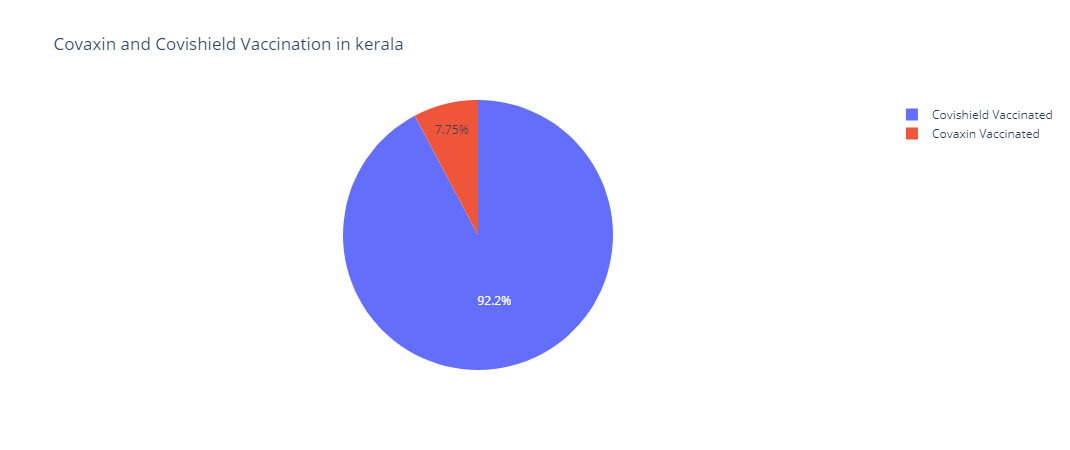

In [75]:
Covaxinke = df_kerala["Total Covaxin Administered"].iloc[142] 
Covishieldke = df_kerala["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxinke,Covishieldke],title="Covaxin and Covishield Vaccination in kerala")

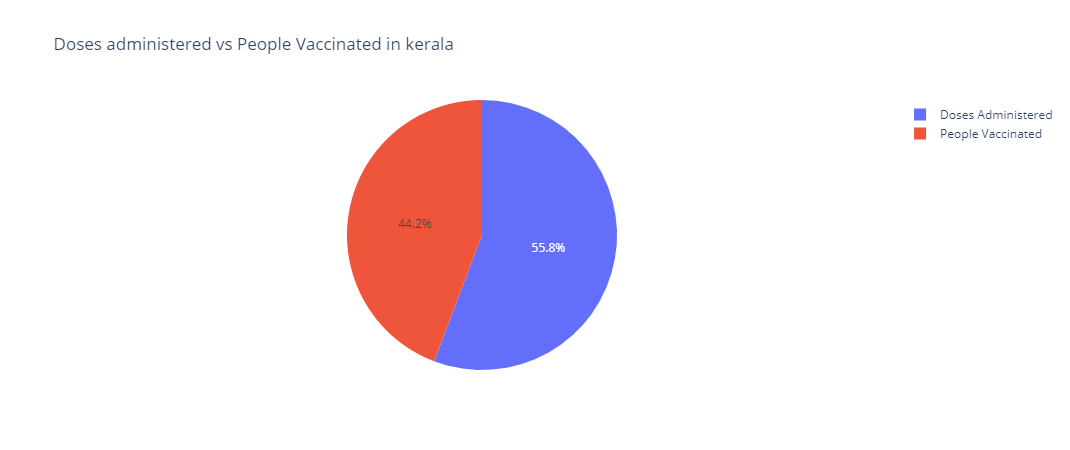

In [76]:
Doseske = df_kerala["Total Doses Administered"].iloc[142] 
Vaccinatedke = df_kerala["Total Individuals Vaccinated"].iloc[142] 
px.pie(names=["Doses Administered","People Vaccinated"],values=[Doseske,Vaccinatedke],title="Doses administered vs People Vaccinated in kerala")

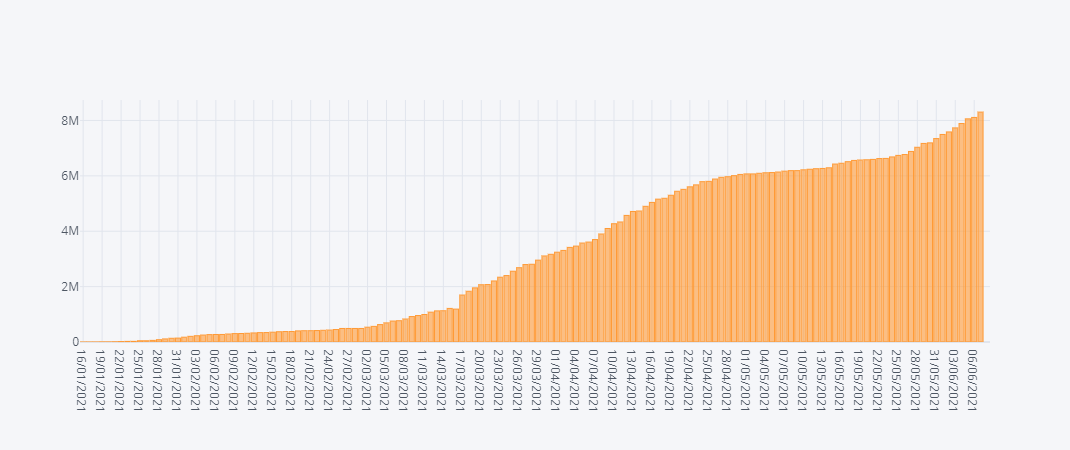

In [77]:
df_kerala.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [78]:
display(df_tamilnadu.iloc[142])

Updated On                             07/06/2021
State                                  Tamil Nadu
Total Individuals Vaccinated            8031685.0
Total Sessions Conducted                 514480.0
Total Sites                                1348.0
First Dose Administered                 8031685.0
Second Dose Administered                2104046.0
Male(Individuals Vaccinated)            4428871.0
Female(Individuals Vaccinated)          3601738.0
Transgender(Individuals Vaccinated)        1076.0
Total Covaxin Administered              1695583.0
Total CoviShield Administered           8440148.0
Total Sputnik V Administered                  0.0
AEFI                                        133.0
18-45 years (Age)                       2950450.0
45-60 years (Age)                       3000710.0
60+ years (Age)                         2078369.0
Total Doses Administered               10135731.0
Name: 4606, dtype: object

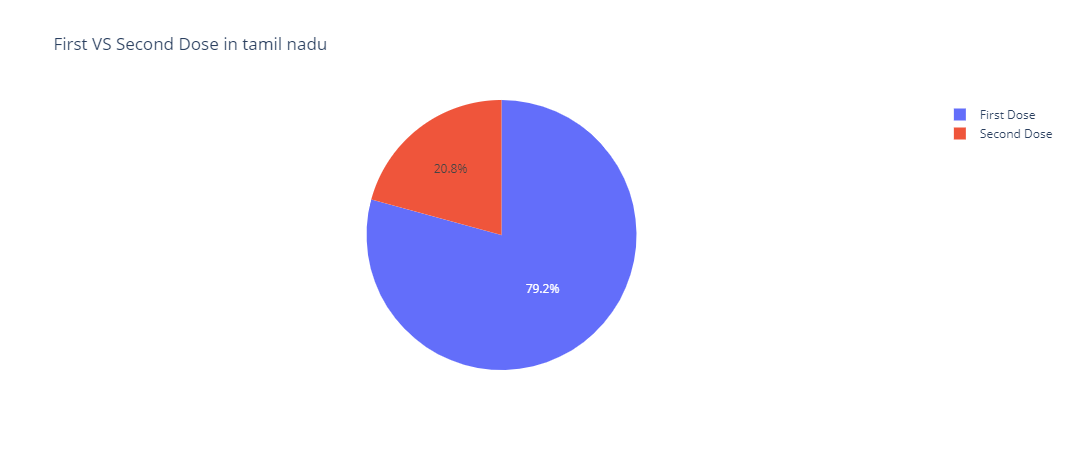

In [81]:
firstdosetn=df_tamilnadu["First Dose Administered"].iloc[142]
seconddosetn=df_tamilnadu["Second Dose Administered"].iloc[142]
px.pie(names=["First Dose","Second Dose"],values=[firstdosetn,seconddosetn],title="First VS Second Dose in tamil nadu")

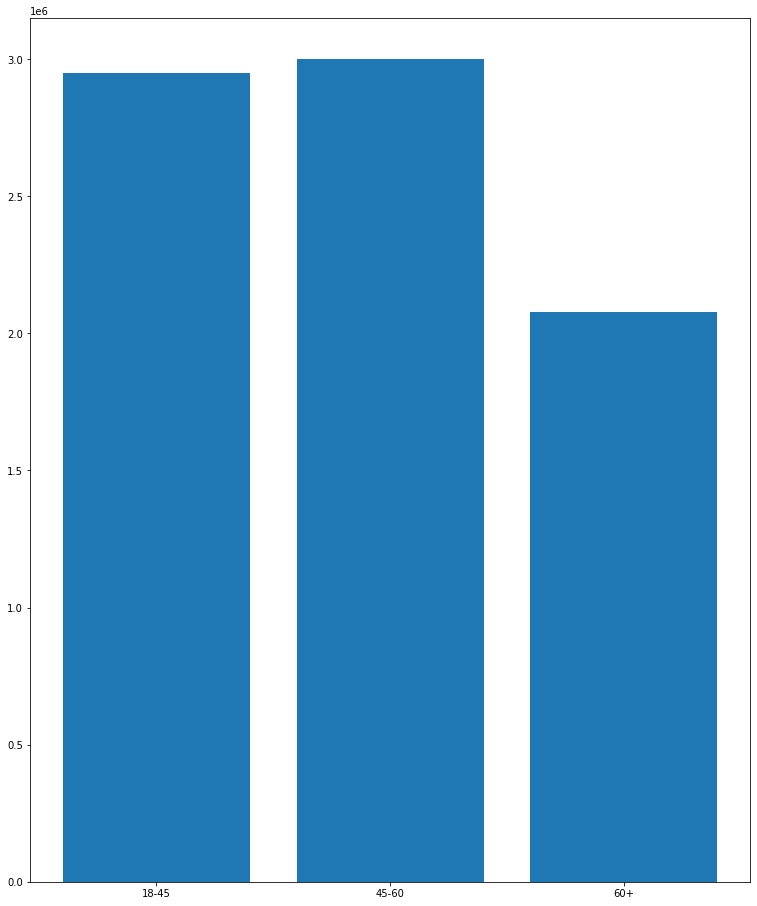

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
firstagetn=df_tamilnadu["18-45 years (Age)"].iloc[142]
secondagetn=df_tamilnadu["45-60 years (Age)"].iloc[142]
thirdagetn=df_tamilnadu["60+ years (Age)"].iloc[142]
ages=['18-45','45-60','60+']
vaccine=[firstagetn,secondagetn,thirdagetn]
ax.bar(ages,vaccine)
plt.show()

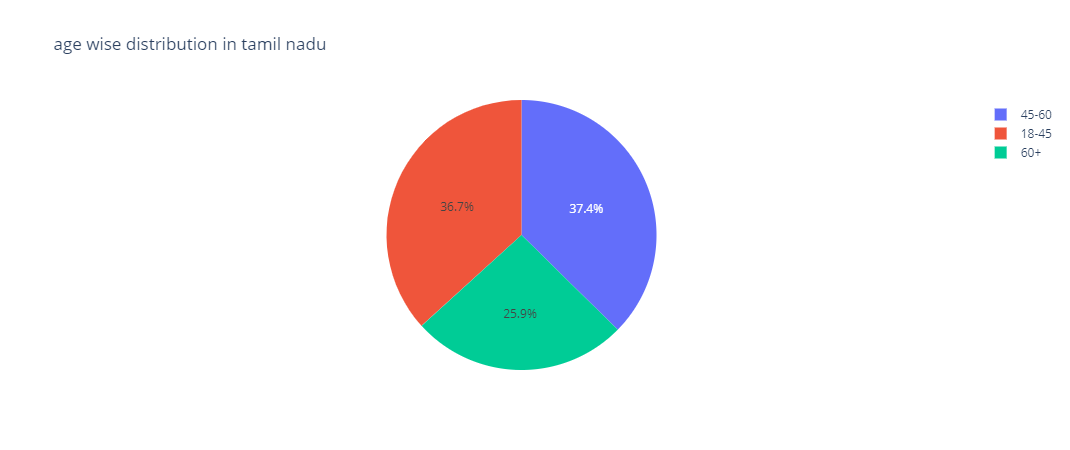

In [83]:
firstagepitn=df_tamilnadu["18-45 years (Age)"].iloc[142]
secondagepitn=df_tamilnadu["45-60 years (Age)"].iloc[142]
thirdagepitn=df_tamilnadu["60+ years (Age)"].iloc[142]
px.pie(names=["18-45","45-60","60+"],values=[firstagepitn,secondagepitn,thirdagepitn],title="age wise distribution in tamil nadu")

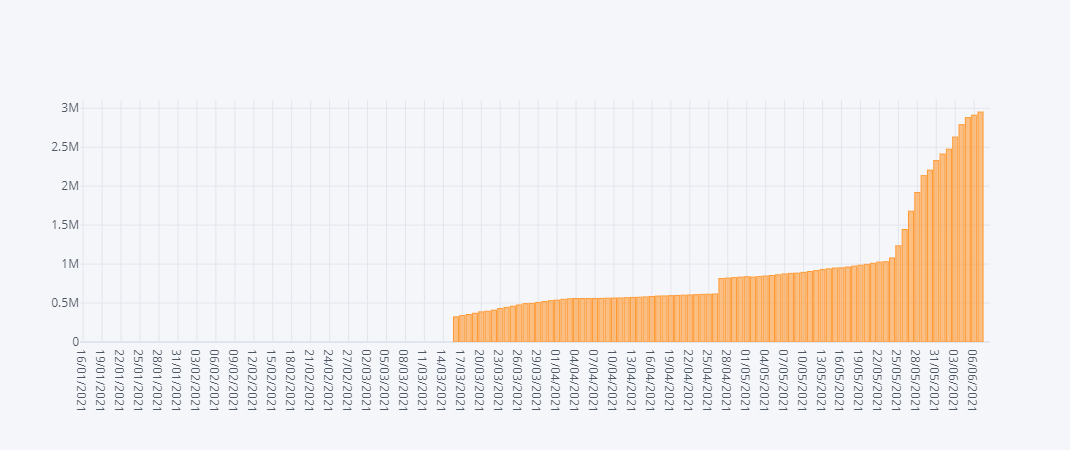

In [84]:
df_tamilnadu.iplot(kind='bar',x='Updated On',y='18-45 years (Age)')

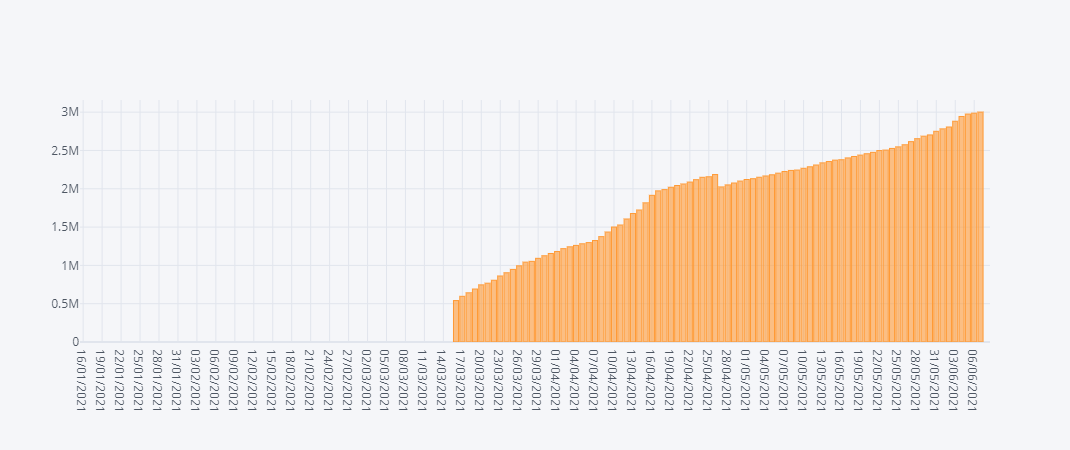

In [85]:
df_tamilnadu.iplot(kind='bar',x='Updated On',y='45-60 years (Age)')

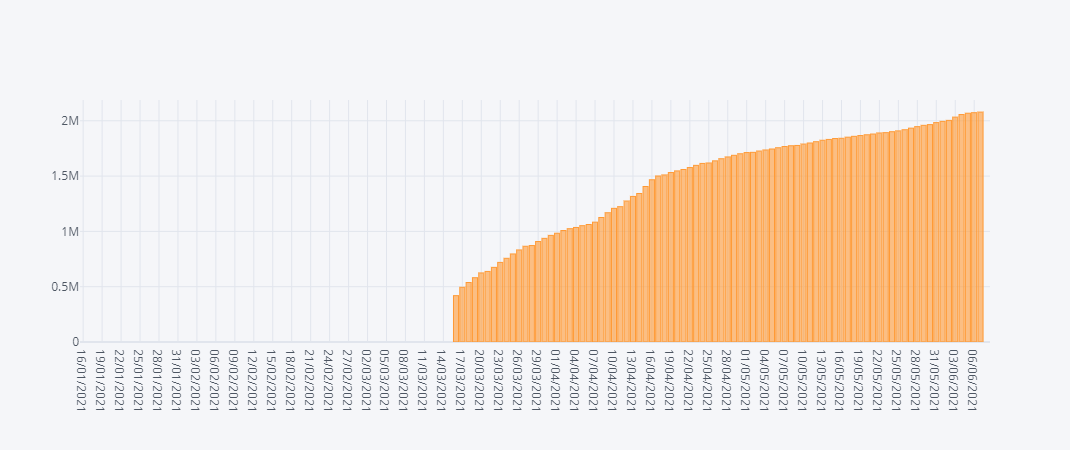

In [86]:
df_tamilnadu.iplot(kind='bar',x='Updated On',y='60+ years (Age)')

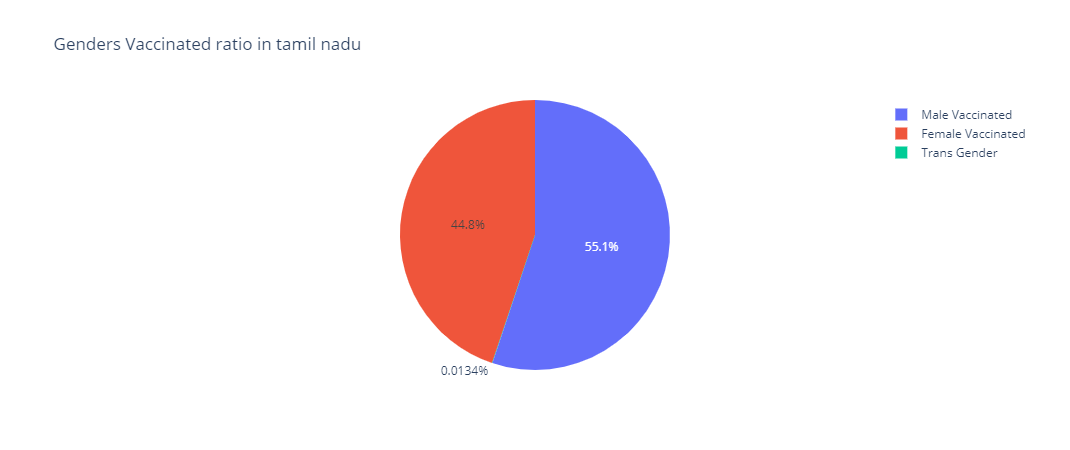

In [87]:
maletn = df_tamilnadu["Male(Individuals Vaccinated)"].iloc[142]
femaletn = df_tamilnadu["Female(Individuals Vaccinated)"].iloc[142] 
transtn = df_tamilnadu["Transgender(Individuals Vaccinated)"].iloc[142]
px.pie(names=["Male Vaccinated","Female Vaccinated","Trans Gender"],values=[maletn,femaletn,transtn],title="Genders Vaccinated ratio in tamil nadu")

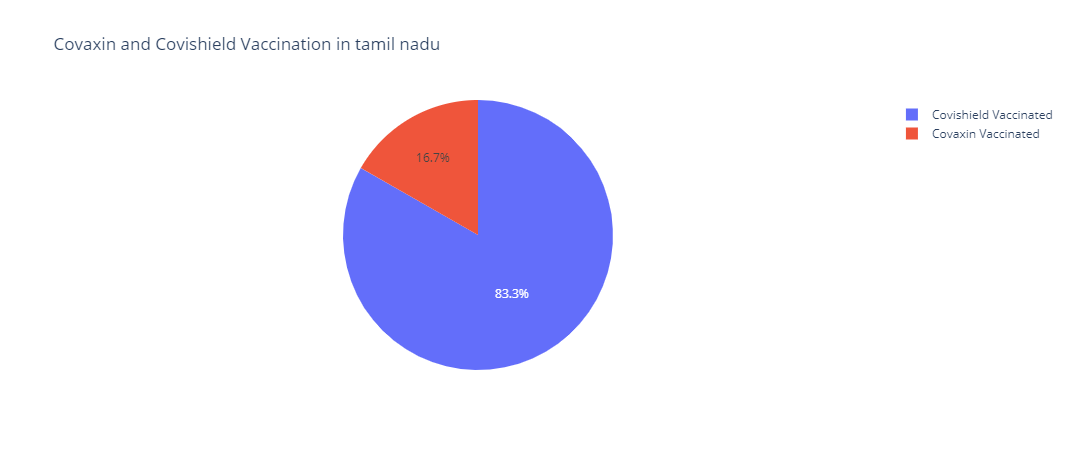

In [88]:
Covaxintn = df_tamilnadu["Total Covaxin Administered"].iloc[142] 
Covishieldtn = df_tamilnadu["Total CoviShield Administered"].iloc[142]  
px.pie(names=["Covaxin Vaccinated","Covishield Vaccinated"],values=[Covaxintn,Covishieldtn],title="Covaxin and Covishield Vaccination in tamil nadu")

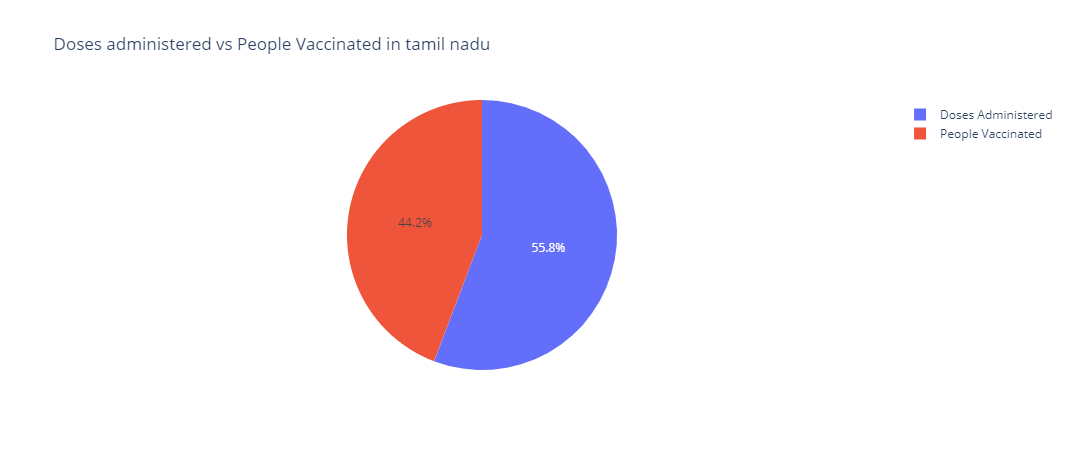

In [79]:
Dosestn = df_tamilnadu["Total Doses Administered"].iloc[142]
Vaccinatedtn = df_tamilnadu["Total Individuals Vaccinated"].iloc[142]
px.pie(names=["Doses Administered","People Vaccinated"],values=[Dosestn,Vaccinatedtn],title="Doses administered vs People Vaccinated in tamil nadu")

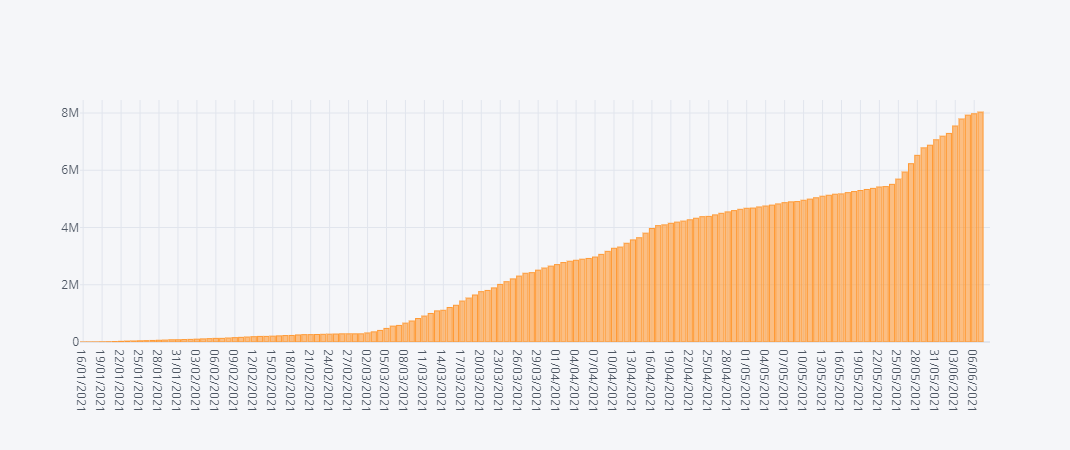

In [80]:
df_tamilnadu.iplot(kind='bar',x='Updated On',y='Total Individuals Vaccinated')

In [89]:
df_vaccine1=pd.read_csv(r'../input/covid19-in-india/covid_vaccine_statewise.csv')
df_vaccine1 = df_vaccine1[df_vaccine1.State != 'India']

In [90]:
top_10=df_vaccine1.groupby('State')['Second Dose Administered'].max().sort_values(ascending=False).reset_index()
trace = go.Table(
    domain=dict(x=[0, 0.52],
                y=[0, 1.0]),
    header=dict(values=["State","Vaccinated"],
                fill = dict(color = '#119DFF'),
                font = dict(color = 'white', size = 14),
                align = ['center'],
               height = 30),
    cells=dict(values=[top_10['State'].head(10),top_10['Second Dose Administered'].head(10)],
               fill = dict(color = ['lime', 'white']),
               align = ['center'],height=20))

trace1 = go.Bar(x=top_10['State'].head(10),
                y=top_10['Second Dose Administered'].head(10),
                xaxis='x1',
                yaxis='y1',
                marker=dict(color='lime'),opacity=0.60)
layout = dict(
    width=1000,
    height=400,
    autosize=False,
    title='Top-10 States with Highest fully vaccinated cases',
    showlegend=False,   
    xaxis1=dict(**dict(domain=[0.58, 1], anchor='y1', showticklabels=True)),
    yaxis1=dict(**dict(domain=[0, 1.0], anchor='x1', hoverformat='.2f')),  
)
fig1 = dict(data=[trace, trace1], layout=layout)
iplot(fig1)